# Baroclinic instability of 3-layer flow

In [1]:
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt
%matplotlib inline

import pyqg

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


# Set up

In [2]:
L =  1000.e3     # length scale of box    [m]
Ld = 15.e3       # deformation scale      [m]
kd = 1./Ld       # deformation wavenumber [m^-1]
Nx = 64          # number of grid points

H1 = 500.        # layer 1 thickness  [m]
H2 = 1750.       # layer 2 
H3 = 1750.       # layer 3 

U1 = 0.05          # layer 1 zonal velocity [m/s]
U2 = 0.01         # layer 2
U3 = 0.00         # layer 3

rho1 = 1025.
rho2 = 1025.275
rho3 = 1025.640

rek = 1.e-7       # linear bottom drag coeff.  [s^-1]
f0  = 0.0001236812857687059 # coriolis param [s^-1]
beta = 1.2130692965249345e-11 # planetary vorticity gradient [m^-1 s^-1]

Ti = Ld/(abs(U1))  # estimate of most unstable e-folding time scale [s]
dt = Ti/500.   # time-step [s]
tmax = 300*Ti      # simulation time [s]

In [3]:
m = pyqg.LayeredModel(nx=Nx, nz=3, U = np.array([U1,U2,U3]),V=np.array([0.,0.,0.]),L=L,f=f0,beta=beta,
                              rd=Ld, H = np.array([H1,H2,H3]), rho=np.array([rho1,rho2,rho3]),rek=rek,
                              dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*300)

2015-10-11 18:19:44,414 - pyqg.model - INFO -  Logger initialized
INFO:pyqg.model: Logger initialized
2015-10-11 18:19:44,477 - pyqg.model - INFO -  Kernel initialized
INFO:pyqg.model: Kernel initialized


# Linear stability analysis

In [4]:
m.stability_analysis(bottom_friction=True)

<matplotlib.colorbar.Colorbar instance at 0x112a07320>

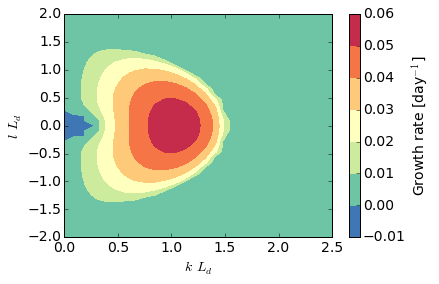

In [5]:
plt.contourf(m.k*Ld,np.fft.fftshift(m.l)*Ld,np.fft.fftshift(m.omg.imag,axes=(0,))*86400)
plt.xlim(0,2.5)
plt.ylim(-2.,2.)
plt.xlabel(r'$k\,L_d$')
plt.ylabel(r'$l\, L_d$')
plt.colorbar(label=r"Growth rate [day$^{-1}$]")

# Vertical modes

In [6]:
m.vertical_modes()

In [7]:
print "The barotropic deformation radius is",m.radii[0]/1.e3," km"
print "The 1st baroclinic deformation radius is",m.radii[1]/1.e3," km"
print "The 2nd baroclinic deformation radius is",m.radii[2]/1.e3," km"

The barotropic deformation radius is 317267.076875  km
The 1st baroclinic deformation radius is 15.375382786  km
The 2nd baroclinic deformation radius is 7.975516272  km


In [8]:
print "The eigenstructure of the 1st baroclinic mode is", m.pmodes[1]

The eigenstructure of the 1st baroclinic mode is [ 0.57735027  0.42365409 -0.3317543 ]


# Initial condition

In [ ]:
sig = 1.e-7
qi = sig*np.vstack([np.random.randn(m.nx,m.ny)[np.newaxis,],np.random.randn(m.nx,m.ny)[np.newaxis,],
                    np.random.randn(m.nx,m.ny)[np.newaxis,]])
m.set_q(qi)

In [ ]:
m.run()

2015-10-11 18:19:51,341 - pyqg.model - INFO -  Step: 5000, Time: 3.000000e+06, KE: 7.176300e-07, CFL: 0.002068
INFO:pyqg.model: Step: 5000, Time: 3.000000e+06, KE: 7.176300e-07, CFL: 0.002068
2015-10-11 18:19:57,640 - pyqg.model - INFO -  Step: 10000, Time: 6.000000e+06, KE: 1.200640e-05, CFL: 0.002527
INFO:pyqg.model: Step: 10000, Time: 6.000000e+06, KE: 1.200640e-05, CFL: 0.002527
2015-10-11 18:20:03,900 - pyqg.model - INFO -  Step: 15000, Time: 9.000000e+06, KE: 3.244047e-04, CFL: 0.006446
INFO:pyqg.model: Step: 15000, Time: 9.000000e+06, KE: 3.244047e-04, CFL: 0.006446
2015-10-11 18:20:10,246 - pyqg.model - INFO -  Step: 20000, Time: 1.200000e+07, KE: 2.861501e-03, CFL: 0.020120
INFO:pyqg.model: Step: 20000, Time: 1.200000e+07, KE: 2.861501e-03, CFL: 0.020120


In [ ]:
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[0,]+m.Qy[0]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[1,]+m.Qy[1]*m.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(m.x/m.rd,m.y/m.rd,(m.q[2,]+m.Qy[2]*m.y+m.hb)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')

# Now repeat the simulation with topography

In [ ]:
b = 10*Ld        # deccay scale of topographic feature [m]
A = .2           # amplitude of topographic feature h/H2 [unitless]

eta = A*np.sin(0.25*m.x/m.rd)

plt.contourf(m.x/Ld,m.y/Ld,eta)
plt.colorbar()
plt.title(r"$\eta = h_b/H_3$")

In [ ]:
mtopo = pyqg.LayeredModel(nx=Nx, nz=3, U = np.array([U1,U2,U3]),V=np.array([0.,0.,0.]),L=L,f=f0,beta=beta,
                              rd=Ld, H = np.array([H1,H2,H3]), rho=np.array([rho1,rho2,rho3]),rek=rek,
                              dt=dt,tmax=tmax, twrite=5000, tavestart=Ti*300, hb=H3*eta)

In [ ]:
mtopo.set_q(qi)

In [ ]:
mtopo.run()

In [ ]:
plt.figure(figsize=(18,4))

plt.subplot(131)
plt.pcolormesh(mtopo.x/mtopo.rd,mtopo.y/mtopo.rd,(mtopo.q[0,]+mtopo.Qy[0]*mtopo.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 1 PV')

plt.subplot(132)
plt.pcolormesh(mtopo.x/mtopo.rd,m.y/mtopo.rd,(mtopo.q[1,]+mtopo.Qy[1]*mtopo.y)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 2 PV')

plt.subplot(133)
plt.pcolormesh(mtopo.x/mtopo.rd,mtopo.y/mtopo.rd,(mtopo.q[2]+mtopo.Qy[2]*mtopo.y+mtopo.hb)/(U1/Ld),cmap='Spectral_r')
plt.xlabel(r'$x/L_d$')
plt.ylabel(r'$y/L_d$')
plt.colorbar()
plt.title('Layer 3 PV')